In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import Dense,Flatten,add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers


In [2]:
X_train_path = "dataset/our485/low/*.*"
y_train_path = "dataset/our485/high/*.*"

In [3]:
import glob
img_list = glob.glob("dataset/eval15/high/*.*")
print(img_list)

['dataset/eval15/high\\1.png', 'dataset/eval15/high\\111.png', 'dataset/eval15/high\\146.png', 'dataset/eval15/high\\16.png', 'dataset/eval15/high\\17.png', 'dataset/eval15/high\\179.png', 'dataset/eval15/high\\18.png', 'dataset/eval15/high\\185.png', 'dataset/eval15/high\\186.png', 'dataset/eval15/high\\189.png', 'dataset/eval15/high\\191.png', 'dataset/eval15/high\\195.png', 'dataset/eval15/high\\196.png', 'dataset/eval15/high\\198.png', 'dataset/eval15/high\\21.png', 'dataset/eval15/high\\22.png', 'dataset/eval15/high\\23.png', 'dataset/eval15/high\\238.png', 'dataset/eval15/high\\244.png', 'dataset/eval15/high\\246.png', 'dataset/eval15/high\\251.png', 'dataset/eval15/high\\257.png', 'dataset/eval15/high\\258.png', 'dataset/eval15/high\\43.png', 'dataset/eval15/high\\44.png', 'dataset/eval15/high\\45.png', 'dataset/eval15/high\\46.png', 'dataset/eval15/high\\468.png', 'dataset/eval15/high\\47.png', 'dataset/eval15/high\\470.png', 'dataset/eval15/high\\471.png', 'dataset/eval15/high

In [4]:
folders = glob.glob('dataset/our485/*')
folders

['dataset/our485\\high', 'dataset/our485\\low']

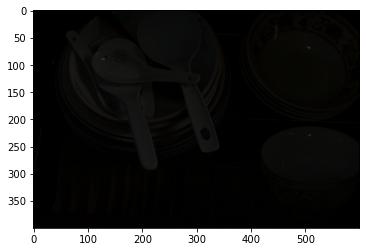

In [5]:
#def PreProcessData(ImagePath):
X=[]
y=[]
for file in glob.glob(X_train_path):
    #print(file)
    a = cv.imread(file)
    X.append(a)
for file in glob.glob(y_train_path):
    #print(file)
    a = cv.imread(file)
    y.append(a)
plt.imshow(X[-3])
X = np.array(X)
y = np.array(y)

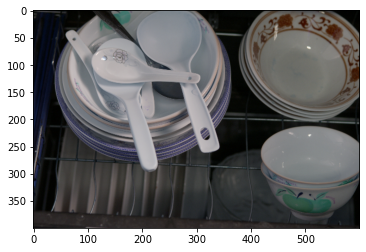

In [6]:
plt.imshow(y[-3])

### VGG16(made manually)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory('dataset/our485',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 800 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('dataset/eval15',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [10]:
img_input =Input(shape=(224, 224,3))

In [11]:
K.clear_session()

# Block 1
x = Conv2D(
  64, (3, 3), activation='relu', padding='same', name='block1_conv1')(
      img_input)
x = Conv2D(
  64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

outputs = Conv2D(1, (3,3), activation='sigmoid', padding="same", strides=(1, 1))(x)

In [12]:
x = Flatten()(x)


In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
#model = Model(inputs=vgg16.input, outputs=prediction)
Model_Enhancer = Model(inputs=img_input, outputs=prediction)

In [14]:
Model_Enhancer.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [15]:
Model_Enhancer.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
r = Model_Enhancer.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
25/25 [==============================] - 713s 29s/step - loss: 0.1698 - accuracy: 0.9737 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 674s 27s/step - loss: 0.0554 - accuracy: 0.9850 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 712s 28s/step - loss: 0.1053 - accuracy: 0.9700 - val_loss: 8.6694e-04 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 709s 28s/step - loss: 0.0800 - accuracy: 0.9825 - val_loss: 5.0086e-04 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 743s 30s/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 7.4014e-04 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 770s 31s/step - loss: 0.0699 - accuracy: 0.9862 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 735s 29s/step - loss: 0.0664 - accuracy: 0.9837 - val_loss: 0.0018 - val_accuracy: 1

### Saving The Model(VGG16)

In [18]:
Model_Enhancer.save('vgg16_100.h5')

In [19]:
from keras.models import load_model
new_model = load_model('vgg16_100.h5')

In [20]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [21]:
new_model.get_weights()

[array([[[[ 0.08507666,  0.03477388, -0.05067956, ..., -0.00244605,
            0.01920989, -0.07549933],
          [-0.05470965, -0.02837479, -0.0806099 , ..., -0.01081569,
           -0.07815956, -0.07242992],
          [-0.00684884,  0.02526816, -0.00337651, ..., -0.031688  ,
            0.09247998, -0.10093651]],
 
         [[ 0.05230248, -0.03135286, -0.00951792, ...,  0.06605781,
           -0.04302211, -0.05122845],
          [ 0.05614273, -0.00355221,  0.0057149 , ..., -0.10542688,
            0.00501837,  0.06563692],
          [ 0.00851389, -0.08464367,  0.01561104, ..., -0.00054017,
           -0.00488248,  0.08411159]],
 
         [[ 0.08539289, -0.03722411, -0.0288357 , ..., -0.01833476,
           -0.02855908,  0.05114628],
          [ 0.02772055, -0.05103636, -0.07577667, ...,  0.00782345,
           -0.06771062, -0.03832711],
          [ 0.08080284,  0.08748455,  0.01566942, ...,  0.02017778,
            0.09208954, -0.00777294]]],
 
 
        [[[ 0.00308197, -0.0276836

In [22]:
new_model.optimizer

## Passed

#### In-build VGG16/VGG19

In [66]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
import glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten


In [75]:
IMAGE_SIZE = [224, 224]
train_path = "our485"
valid_path = 'Test'

In [76]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [77]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [78]:
folders = glob.glob('our485/*')
folders

['our485\\high', 'our485\\low']

In [79]:
x = Flatten()(vgg16.output)


In [80]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [81]:
model.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [82]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [84]:
training_set = datagen.flow_from_directory('our485',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 970 images belonging to 2 classes.


In [85]:
test_set = datagen.flow_from_directory('Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 335 images belonging to 7 classes.


In [86]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
10/31 [========>.....................] - ETA: 2:30 - loss: 0.3396 - accuracy: 0.8594

KeyboardInterrupt: 

#### Something idk

In [50]:
import keras
import keras.layers
K.clear_session()

inputs = keras.Input(shape=(None, None, 3), name='img')

inputs = keras.Input(shape=(None, None, 3), name='img')
out1 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(inputs)
out2 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out1)
out3 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out2)
out4 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out3)
in5 = layers.add([out3, out4])
out5 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(in5)
in6 = layers.add([out2, out5])
out6 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(in6)
in7 = layers.add([out1, out6])
outputs = layers.Conv2D(1, (3,3), activation='sigmoid', padding="same", strides=(1, 1))(in7)
model = keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss='mean_squared_error')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 3 9248        conv2d_1[0][0]                   
_______________________________________________________________________________________

In [51]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,400,600,3)
        y_temp = y[i] / 255
        y_input = y_temp.reshape(1,400,600,3)
        yield (X_input,y_input)
#Model_Enhancer.fit_generator(,epochs=20,verbose=1,steps_per_epoch=24)
#Model_Enhancer.fit(X, y, batch_size = 32, epochs = 100)
model.fit(GenerateInputs(X,y), epochs=20, verbose=1, steps_per_epoch=24)


Epoch 1/20
 6/24 [======>.......................] - ETA: 23s - loss: 0.1443

KeyboardInterrupt: 